In [138]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pickle
from tensorflow.keras.models import load_model
from tensorflow.math import confusion_matrix
from helper import data_import, relabel
from tensorflow.keras import Model
import numpy as np
import cv2

In [2]:
train_path='./Group_10/train'
test_path='./Group_10/test'
val_path='./Group_10/val'

# All of these are lists. Images are not of same shape, hence can't have np.array()
x_train, y_train = data_import(train_path)
x_test, y_test = data_import(test_path)
x_val, y_val = data_import(val_path)

y_train = relabel(y_train)
y_test = relabel(y_test)
y_val = relabel(y_val)

# Architechture 1

In [3]:
model = load_model("./models/architecture1.h5")
model.summary()

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "Architecture1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10

2023-05-01 11:51:20.758511: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-01 11:51:20.758609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
print("Train loss and accuracy for architechture 1:")
loss, acc = model.evaluate(x_train, y_train, verbose=0)
y_pdfs = model(x_train)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_train, y_pred).numpy())

2023-05-01 11:51:20.955445: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Train loss and accuracy for architechture 1:


2023-05-01 11:51:21.070473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Loss 0.0006
Accuracy: 1.0000
[[50  0  0  0  0]
 [ 0 50  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 50  0]
 [ 0  0  0  0 50]]


In [5]:
print("Validation loss and accuracy for architechture 1:")
loss, acc = model.evaluate(x_val, y_val, verbose=0)
y_pdfs = model(x_val)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_val, y_pred).numpy())

Validation loss and accuracy for architechture 1:
Loss 1.0972
Accuracy: 0.8600
[[10  0  0  0  0]
 [ 0  8  1  0  1]
 [ 2  0  7  1  0]
 [ 0  0  1  9  0]
 [ 0  1  0  0  9]]


In [6]:
print("Test loss and accuracy for architechture 1:")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
y_pdfs = model(x_test)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred).numpy())

Test loss and accuracy for architechture 1:
Loss 1.2876
Accuracy: 0.8000
Confusion matrix:
[[18  0  0  1  1]
 [ 0 16  0  2  2]
 [ 1  0 16  1  2]
 [ 0  0  2 15  3]
 [ 0  4  0  1 15]]


# Architechture 2

In [7]:
model = load_model("./models/architecture2.h5")
model.summary()

Model: "Architecture2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                 

In [8]:
print("Train loss and accuracy for architechture 2:")
loss, acc = model.evaluate(x_train, y_train, verbose=0)
y_pdfs = model(x_train)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_train, y_pred).numpy())

Train loss and accuracy for architechture 2:


2023-05-01 11:51:21.823903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Loss 0.2018
Accuracy: 0.9320
[[48  1  0  1  0]
 [ 0 50  0  0  0]
 [ 0  0 50  0  0]
 [ 1  1  0 48  0]
 [ 1  6  0  6 37]]


In [9]:
print("Validation loss and accuracy for architechture 2:")
loss, acc = model.evaluate(x_val, y_val, verbose=0)
y_pdfs = model(x_val)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_val, y_pred).numpy())

Validation loss and accuracy for architechture 2:
Loss 1.0138
Accuracy: 0.7000
[[10  0  0  0  0]
 [ 0  9  1  0  0]
 [ 2  1  6  0  1]
 [ 0  2  0  8  0]
 [ 3  3  0  2  2]]


In [10]:
print("Test loss and accuracy for architechture 2:")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
y_pdfs = model(x_test)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred).numpy())

Test loss and accuracy for architechture 2:
Loss 1.0630
Accuracy: 0.6700
Confusion matrix:
[[16  3  0  1  0]
 [ 0 14  1  5  0]
 [ 0  0 19  1  0]
 [ 3  3  3 11  0]
 [ 1  9  0  3  7]]


# Architechture 3

In [11]:
model = load_model("./models/architecture3.h5")
model.summary()

Model: "Architecture3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                 

In [12]:
print("Train loss and accuracy for architechture 3:")
loss, acc = model.evaluate(x_train, y_train, verbose=0)
y_pdfs = model(x_train)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_train, y_pred).numpy())

Train loss and accuracy for architechture 3:


2023-05-01 11:51:22.491706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Loss 0.0008
Accuracy: 1.0000
[[50  0  0  0  0]
 [ 0 50  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 50  0]
 [ 0  0  0  0 50]]


In [13]:
print("Validation loss and accuracy for architechture 3:")
loss, acc = model.evaluate(x_val, y_val, verbose=0)
y_pdfs = model(x_val)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_val, y_pred).numpy())

Validation loss and accuracy for architechture 3:
Loss 1.0095
Accuracy: 0.8000
[[10  0  0  0  0]
 [ 0  9  0  1  0]
 [ 1  1  6  1  1]
 [ 0  1  0  9  0]
 [ 2  2  0  0  6]]


In [14]:
print("Test loss and accuracy for architechture 3:")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
y_pdfs = model(x_test)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred).numpy())

Test loss and accuracy for architechture 3:
Loss 1.1839
Accuracy: 0.8000
Confusion matrix:
[[17  2  0  0  1]
 [ 1 16  0  2  1]
 [ 1  1 17  1  0]
 [ 0  1  1 18  0]
 [ 4  4  0  0 12]]


# Best Architecture (architecture 2)

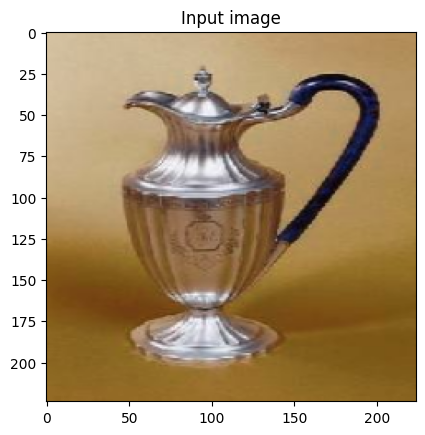

In [140]:
tf.random.set_seed(7)
idx = tf.random.uniform(shape=(1,),
                  minval=0, maxval=250, 
                  dtype=tf.dtypes.int32)
idx=240
img = x_train[idx, :, :, :].reshape(224, 224, 3)
plt.figure()
plt.title("Input image")
plt.imshow(img)
img = img.reshape(1, 224, 224, 3)

In [141]:
model = load_model("./models/architecture1.h5")

#itterate over layers to find conv layers
features = []
for layer in model.layers:
    if "conv" in layer.name:
        # print(layer.name)
        features.append(layer.output)
map_model = Model(inputs=model.input, outputs=features)

In [142]:
map_model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 16)        3216      
                                                                 
Total params: 6,128
Trainable params: 6,128
Non-trainable params: 0
________________________________________________________

In [143]:
feature_maps = map_model(img)

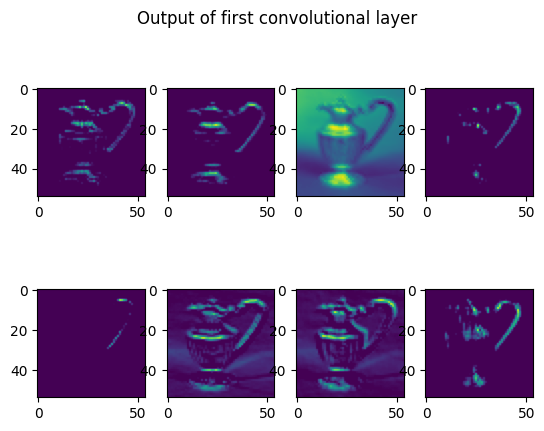

In [144]:
plt.figure()
plt.suptitle("Output of first convolutional layer")
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(feature_maps[0][0, :, :, i])
    # print(feature_maps[0][1, :, :, i])
    # plt.axis("off")
    

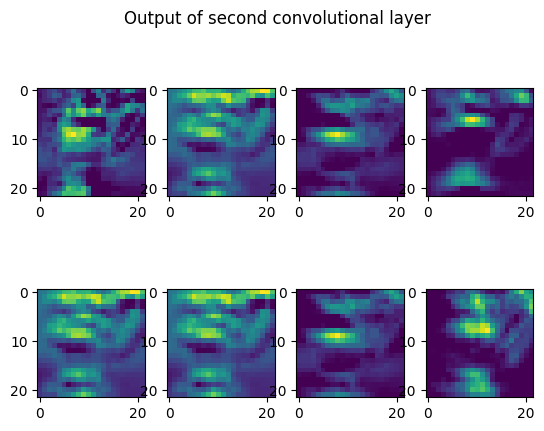

In [145]:
plt.figure()
plt.suptitle("Output of second convolutional layer")
tf.random.set_seed(35)
idx = tf.random.uniform(shape=(8,), minval=0, maxval=16, dtype=tf.dtypes.int32)
for n, i in enumerate(idx):
    plt.subplot(2,4,n+1)
    plt.imshow(feature_maps[1][0, :, :, i])
    # print(feature_maps[0][1, :, :, i])
    # plt.axis("off")

In [146]:
# plt.figure()
# plt.suptitle("Output of third convolutional layer")
# tf.random.set_seed(35)
# idx = tf.random.uniform(shape=(8,), minval=0, maxval=32, dtype=tf.dtypes.int32)
# for n, i in enumerate(idx):
#     plt.subplot(2,4,n+1)
#     plt.imshow(feature_maps[2][0, :, :, i])
#     # print(feature_maps[0][1, :, :, i])
#     plt.axis("off")

In [147]:
imgs = [x_train[2+20], #piano
       x_train[52+20], #helicoptor
       x_train[102], #car
       x_train[152+20], #laptop
       x_train[202], #vase
       ]
# plt.imshow(img1)

In [150]:
masked_imgs = []
for i, img in enumerate(imgs):
    img = img.reshape(1, 224, 224, 3)
    feature_map = map_model(img)

    # features from 2nd layer
    features = feature_map[1]

    # find maximally activated filter output
    # max_pos = np.argmax(np.squeeze(features))
    max_activation = np.max(features, axis=(0,3))
    max_activation = max_activation.reshape(22, 22, 1)

    patch = tf.image.resize(max_activation, size=(224, 224)).numpy()
    

    # Normalize the patch to values between 0 and 1
    patch -= patch.mean()
    patch /= patch.std() + 1e-5
    patch *= 0.1
    
    # Add 0.5 to shift the values to be between 0 and 1
    patch += 0.5
    
    # Clip the values to be between 0 and 1
    patch = np.clip(patch, 0, 1)
    ret, mask = cv2.threshold(patch, 0.5, 1, cv2.THRESH_BINARY)
    img = img.reshape(224, 224, 3)
    # # print(img.shape)
    # bw_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    masked_img = np.zeros_like(img)
    masked_img[:,:,0] = img[:,:,0]*mask
    masked_img[:,:,1] = img[:,:,1]*mask
    masked_img[:,:,2] = img[:,:,2]*mask

    masked_imgs.append(masked_img)


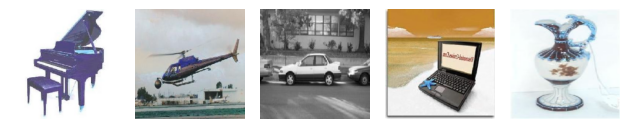

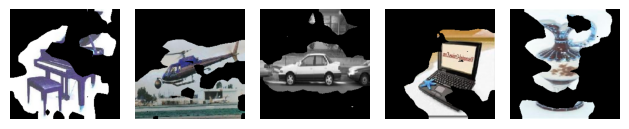

In [151]:
# plt.figure(figsize=(10,5))
for i, img in enumerate(imgs):
    plt.subplot(1,5,i+1)
    # plt.suptitle("Original input")
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()
for i, img in enumerate(masked_imgs):
    plt.subplot(1,5,i+1)
    # plt.suptitle("Patch activating the neuron")
    plt.imshow(img[:,:,:])
    # plt.title('Max activation for filter ')
    plt.axis('off')
    # plt.show()
plt.tight_layout()
plt.show()

# Transfer learned VGG19

In [152]:
model = load_model("./models/vgg19_mod.h5")
model.summary()

Model: "Modified-VGG19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)    

In [153]:
print("Train loss and accuracy for Transfer learned from VGG19 model:")
loss, acc = model.evaluate(x_train, y_train, verbose=0)
y_pdfs = model.predict(x_train, verbose=0)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_train, y_pred).numpy())

Train loss and accuracy for Transfer learned from VGG19 model:


2023-05-01 19:42:33.371655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-01 19:42:38.436864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Loss 0.0000
Accuracy: 1.0000
[[50  0  0  0  0]
 [ 0 50  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 50  0]
 [ 0  0  0  0 50]]


In [154]:
print("Validation loss and accuracy for Transfer learned from VGG19 model:")
loss, acc = model.evaluate(x_val, y_val, verbose=0)
y_pdfs = model(x_val)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_val, y_pred).numpy())

Validation loss and accuracy for Transfer learned from VGG19 model:
Loss 0.0000
Accuracy: 1.0000
[[10  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 10]]


In [155]:
print("Test loss and accuracy for Transfer learned from VGG19 model:")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
y_pdfs = model(x_test)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred).numpy())

Test loss and accuracy for Transfer learned from VGG19 model:
Loss 0.0000
Accuracy: 1.0000
Confusion matrix:
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


In [156]:
#itterate over layers to find conv layers
features = []
for layer in model.layers:
    if "conv" in layer.name:
        # print(layer.name)
        features.append(layer.output)
map_model = Model(inputs=model.input, outputs=features)

In [157]:
map_model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [168]:
img = imgs[0].reshape(1, 224, 224, 3)
feature_map = map_model(img)
feature_map[15].shape

TensorShape([1, 14, 14, 512])

In [169]:
import numpy as np
import cv2

masked_imgs = []
for i, img in enumerate(imgs):
    img = img.reshape(1, 224, 224, 3)
    feature_map = map_model(img)

    # features from 15th layer
    features = feature_map[15]

    # find maximally activated filter output
    max_activation = np.max(features, axis=(0,3))
    max_activation = max_activation.reshape(14, 14, 1)

    patch = tf.image.resize(max_activation, size=(224, 224)).numpy()
    
    # Normalize the patch to values between 0 and 1
    patch -= patch.mean()
    patch /= patch.std() + 1e-5
    patch *= 0.1
    
    # Add 0.5 to shift the values to be between 0 and 1
    patch += 0.5
    
    # Clip the values to be between 0 and 1
    patch = np.clip(patch, 0, 1)
    ret, mask = cv2.threshold(patch, 0.5, 1, cv2.THRESH_BINARY)
    img = img.reshape(224, 224, 3)
    # # print(img.shape)
    # bw_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    masked_img = np.zeros_like(img)
    masked_img[:,:,0] = img[:,:,0]*mask
    masked_img[:,:,1] = img[:,:,1]*mask
    masked_img[:,:,2] = img[:,:,2]*mask

    masked_imgs.append(masked_img)


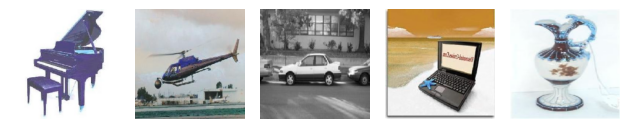

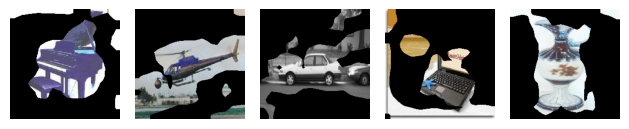

In [170]:
for i, img in enumerate(imgs):
    plt.subplot(1,5,i+1)
    # plt.suptitle("Original input")
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()
for i, img in enumerate(masked_imgs):
    plt.subplot(1,5,i+1)
    # plt.suptitle("Patch activating the neuron")
    plt.imshow(img)
    # plt.title('Max activation for filter ')
    plt.axis('off')
    # plt.show()
plt.tight_layout()
plt.show()

- VGG19 has better feature maps. Laptop keyboard, and other things look more focuses compared to our small CNN.

# Guided Backprop

In [34]:
model = load_model("./models/vgg19_mod.h5")
model.summary()

Model: "Modified-VGG19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)    

In [78]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [96]:
tf.random.set_seed(7)
idx = tf.random.uniform(shape=(1,),
                  minval=0, maxval=250, 
                  dtype=tf.dtypes.int32)
idx=240
img = x_train[idx, :, :, :].reshape(224, 224, 3)
img = tf.expand_dims(img, axis=0)

In [97]:
gb_model = Model(
    inputs = [model.inputs],    
    outputs = [model.get_layer('block5_conv4').output])
layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]

@tf.custom_gradient
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
    return tf.nn.relu(x), grad

for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu
        
with tf.GradientTape() as tape:
    inputs = tf.cast(img, tf.float32)
    tape.watch(inputs)
    outputs = gb_model(inputs)[0]
grads = tape.gradient(outputs,inputs)[0]

In [100]:
gb_model = Model(inputs = [model.inputs],    
                outputs = [model.get_layer('block5_conv4').output])
layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]

@tf.custom_gradient
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
    return tf.nn.relu(x), grad

for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu


gp_imgs = []
g_cams = []
for i, img in enumerate(imgs):
    img = img.reshape((1,224,224,3))
    with tf.GradientTape() as tape:
        inputs = tf.cast(img, tf.float32)
        tape.watch(inputs)
        outputs = gb_model(inputs)[0]
    grads = tape.gradient(outputs,inputs)[0]
    
    guided_back_prop =grads
    gb_viz = np.array(np.squeeze(guided_back_prop))
    gb_viz -= np.min(gb_viz)
    gb_viz /= gb_viz.max()
    gp_imgs.append(gb_viz)


    weights = tf.reduce_mean(grads, axis=(0, 1))
    grad_cam = np.ones(outputs.shape[0: 2], dtype = np.float32)
    for i, w in enumerate(weights):
        grad_cam += w * outputs[:, :, i]

    grad_cam_img = cv2.resize(grad_cam.numpy(), (224, 224))
    grad_cam_img = np.maximum(grad_cam_img, 0)
    heatmap = (grad_cam_img - grad_cam_img.min()) / (grad_cam_img.max() - grad_cam_img.min())
    grad_cam_img = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    # output_image = cv2.addWeighted(cv2.cvtColor(np.uint8(img), cv2.COLOR_RGB2BGR), 0.5, grad_cam_img, 1, 0)
    output_image = cv2.addWeighted(np.squeeze(img), 1, grad_cam_img, 1, 0)
    g_cams.append(output_image)
        

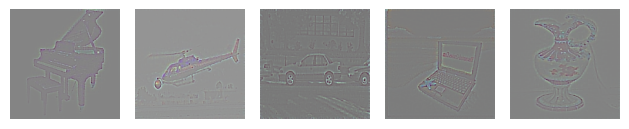

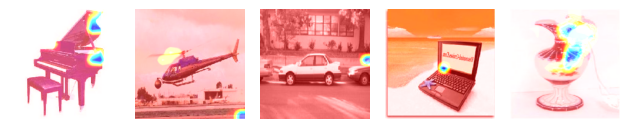

In [101]:
for i, img in enumerate(gp_imgs):
    plt.subplot(1,5,i+1)
    # plt.suptitle("Original input")
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()
for i, img in enumerate(g_cams):
    plt.subplot(1,5,i+1)
    # plt.suptitle("Patch activating the neuron")
    plt.imshow(img)
    # plt.title('Max activation for filter ')
    plt.axis('off')
    # plt.show()
plt.tight_layout()
plt.show()

In [73]:
grads.shape

TensorShape([224, 224, 3])

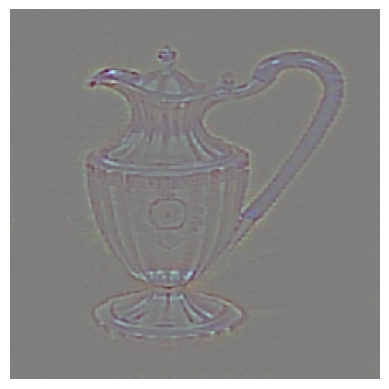

In [74]:
guided_back_prop =grads
# gb_viz = np.dstack((
#             guided_back_prop[:, :, 0],
#             guided_back_prop[:, :, 1],
#             guided_back_prop[:, :, 2],
#         ))       
# print(grads.shape)
gb_viz = np.array(np.squeeze(guided_back_prop))
gb_viz -= np.min(gb_viz)
gb_viz /= gb_viz.max()

plt.imshow(gb_viz)
plt.axis("off")
plt.show()

In [75]:
outputs.shape

TensorShape([14, 14, 512])

In [76]:
weights = tf.reduce_mean(grads, axis=(0, 1))
grad_cam = np.ones(outputs.shape[0: 2], dtype = np.float32)
for i, w in enumerate(weights):
    grad_cam += w * outputs[:, :, i]

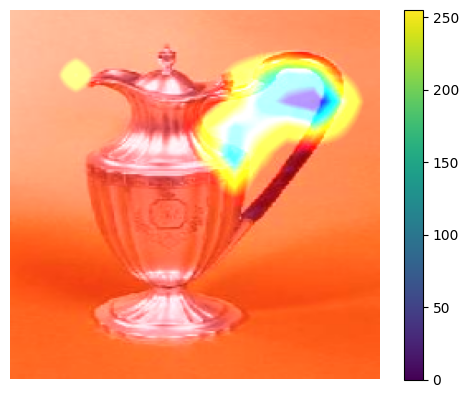

In [77]:
grad_cam_img = cv2.resize(grad_cam.numpy(), (224, 224))
grad_cam_img = np.maximum(grad_cam_img, 0)
heatmap = (grad_cam_img - grad_cam_img.min()) / (grad_cam_img.max() - grad_cam_img.min())
grad_cam_img = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
# output_image = cv2.addWeighted(cv2.cvtColor(np.uint8(img), cv2.COLOR_RGB2BGR), 0.5, grad_cam_img, 1, 0)
output_image = cv2.addWeighted(np.squeeze(img), 1, grad_cam_img, 1, 0)
plt.imshow(output_image)
plt.axis('off')
plt.colorbar()